In [2]:
import nshutils

nshutils.pretty()

In [6]:
import pickle

with open(
    "/net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/notebooks/problematic_samples.relaxdata.pkl",
    "rb",
) as f:
    data = pickle.load(f)

print(type(data), len(data))

<class 'list'> 75


Error: 0.4876 True Formation Energy: -2.0179 Predicted Formation Energy: -2.5055


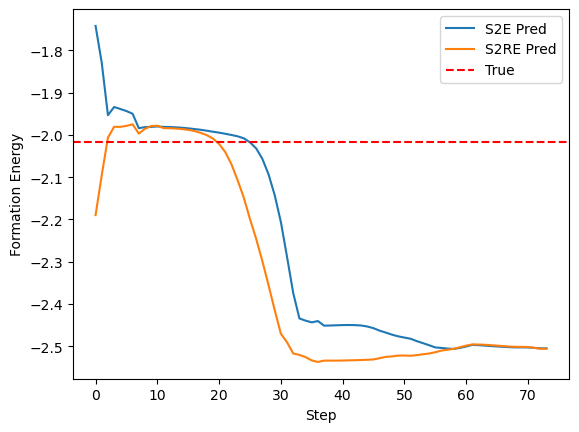

In [15]:
from typing import Any

import ase
import ase.visualize
import matplotlib.pyplot as plt
from IPython.display import display


def plot_energy_vs_steps(sample: dict[str, Any], ax: plt.Axes | None = None):
    e_form_true = sample["true_formation_energy"]

    if ax is None:
        _, ax = plt.subplots()
    ax.plot(sample["s2e_energies"], label="S2E Pred")
    ax.plot(sample["s2re_energies"], label="S2RE Pred")
    ax.axhline(y=e_form_true, color="r", linestyle="--", label="True")

    ax.set_xlabel("Step")
    ax.set_ylabel("Formation Energy")
    ax.legend()

    return ax


def plot_trajectory(sample: dict[str, Any]):
    print(
        f"Error: {sample['error']:0.4f}",
        f"True Formation Energy: {sample['true_formation_energy']:0.4f}",
        f"Predicted Formation Energy: {sample['s2re_energies'][-1]:0.4f}",
    )
    display(ase.visualize.view([ase.Atoms(**d) for d in sample["atoms"]], viewer="ngl"))


def plot_system(sample: dict[str, Any]):
    plot_trajectory(sample)
    plot_energy_vs_steps(sample)
    plt.show()


plot_system(data[1])